In [ ]:
from pybemt.solver import Solver
from time import time
import pandas as pd

In [2]:
s = Solver('rotor_config.ini')
T, Q, P, section_df = s.run()

--- Results ---
Trust (N):	 18.165594716317926
Torque (Nm):	 0.6331256667274108
Power (W):	 132.60152955933157


In [ ]:
# WARNING: TO REDO SWEEP INCLUDING V_inf
df = pd.DataFrame(columns=['rpm', 'v_inf', 'T', 'Q', 'P'])
time1 = time()
for rpm in range(0, 4000, 10):
    for v_inf in range(0, 20, 1):
        T, Q, P = s.solve(s.rotor, s.twist, rpm, v_inf, s.rotor.diameter)
        df = df.append({'rpm': rpm, 'v_inf': v_inf, 'T': T, 'Q': Q, 'P': P}, ignore_index=True)
final_time = time() - time1
print(f"Time taken for sweep: {final_time:.2f} seconds")

In [ ]:


time1 = time()
df, section_df = s.run_sweep('rpm', 500, 0, 8000)
final_time = time() - time1
print(f"Time taken for sweep: {final_time:.2f} seconds")

c:\Users\vaiu\Desktop\git\MDO_Drone_Controller_Trajectory_Noise\Rotor\pybemt\rotor.py:270: RuntimeWarning: divide by zero encountered in scalar divide
  resid = sin(phi)/(1 + C*a) - v_inf*cos(phi)/(omega*self.radius*(1 - C*ap))
c:\Users\vaiu\Desktop\git\MDO_Drone_Controller_Trajectory_Noise\Rotor\pybemt\solver.py:102: RuntimeWarning: divide by zero encountered in scalar divide
  J = self.v_inf/(n*D)
c:\Users\vaiu\Desktop\git\MDO_Drone_Controller_Trajectory_Noise\Rotor\pybemt\solver.py:105: RuntimeWarning: divide by zero encountered in scalar divide
  CT = T/(rho*n**2*D**4)
c:\Users\vaiu\Desktop\git\MDO_Drone_Controller_Trajectory_Noise\Rotor\pybemt\solver.py:106: RuntimeWarning: divide by zero encountered in scalar divide
  CQ = Q/(rho*n**2*D**5)
c:\Users\vaiu\Desktop\git\MDO_Drone_Controller_Trajectory_Noise\Rotor\pybemt\solver.py:112: RuntimeWarning: invalid value encountered in scalar divide
  eta = (CT/CP)*J


--- Results ---
Trust (N):	 -0.024458656591399824
Torque (Nm):	 -0.0004131720430853441
Power (W):	 -0.0
--- Results ---
Trust (N):	 -0.02435492284915879
Torque (Nm):	 -0.0003538199031828522
Power (W):	 -3.7056565688481076e-05
--- Results ---
Trust (N):	 -0.024246705850589446
Torque (Nm):	 -0.0002958854647861066
Power (W):	 -6.197785406349353e-05
--- Results ---
Trust (N):	 -0.024137961992224784
Torque (Nm):	 -0.0002396468046887282
Power (W):	 -7.529667619116154e-05
--- Results ---
Trust (N):	 -0.02402921938378123
Torque (Nm):	 -0.000185266297446952
Power (W):	 -7.761386693565041e-05
--- Results ---
Trust (N):	 -0.02392136938468729
Torque (Nm):	 -0.0001327635175193048
Power (W):	 -6.952350565543823e-05
--- Results ---
Trust (N):	 -0.023814157724486203
Torque (Nm):	 -8.245903175755235e-05
Power (W):	 -5.181701480518142e-05
--- Results ---
Trust (N):	 -0.023707745425264368
Torque (Nm):	 -3.4257639268656546e-05
Power (W):	 -2.511530057891184e-05
--- Results ---
Trust (N):	 -0.0236025828710

c:\Users\vaiu\Desktop\git\MDO_Drone_Controller_Trajectory_Noise\Rotor\pybemt\rotor.py:270: RuntimeWarning: invalid value encountered in scalar subtract
  resid = sin(phi)/(1 + C*a) - v_inf*cos(phi)/(omega*self.radius*(1 - C*ap))


--- Results ---
Trust (N):	 22.45386510039648
Torque (Nm):	 0.7767462085136264
Power (W):	 180.19211414592982
f(a) and f(b) must have different signs
Bisect failed, switching to brute solver
--- Results ---
Trust (N):	 22.474756427040443
Torque (Nm):	 0.7774475591182464
Power (W):	 180.43624003848058
f(a) and f(b) must have different signs
Bisect failed, switching to brute solver
--- Results ---
Trust (N):	 22.49565743116599
Torque (Nm):	 0.7781492251583967
Power (W):	 180.68058608175627
f(a) and f(b) must have different signs
Bisect failed, switching to brute solver
--- Results ---
Trust (N):	 22.516568113012834
Torque (Nm):	 0.7788512066346508
Power (W):	 180.9251523749994
f(a) and f(b) must have different signs
Bisect failed, switching to brute solver
--- Results ---
Trust (N):	 22.53748847310306
Torque (Nm):	 0.7795535035535519
Power (W):	 181.1699390188403
f(a) and f(b) must have different signs
Bisect failed, switching to brute solver
--- Results ---
Trust (N):	 22.5584185106684


In [7]:
import numpy as np

# Correct T, Q, P, CT, CQ, CP  values on dataframe to set 0 when they are negative. 
df['T'] = df['T'].clip(lower=0)
df['Q'] = df['Q'].clip(lower=0)
df['P'] = df['P'].clip(lower=0)
df['CT'] = df['CT'].clip(lower=0)
df['CQ'] = df['CQ'].clip(lower=0)
df['CP'] = df['CP'].clip(lower=0)

# Correct T, Q, P, CT, CQ, CP values on dataframe to set 0 when they are inf, -inf, or NaN, or negative.
df['P'] = df['P'].replace([np.inf, -np.inf, np.nan], 0)
df['CT'] = df['CT'].replace([np.inf, -np.inf, np.nan], 0)
df['CQ'] = df['CQ'].replace([np.inf, -np.inf, np.nan], 0)
df['CP'] = df['CP'].replace([np.inf, -np.inf, np.nan], 0)

# Make rpm values integer
df['rpm'] = df['rpm'].astype(int)

# Save the corrected dataframe to a new CSV file keeping columns [rpm, T, Q, P, CT, CQ, CP]
df[['rpm', 'T', 'Q', 'P', 'CT', 'CQ', 'CP']].to_csv('rotor_model_data_bemt.csv', index=False, sep=';')

In [32]:
# Crate a simple dense neural network model to fit the data using pytorch
import torch
import torch.nn as nn
import torch.optim as optim

class RotorModel(nn.Module):
    def __init__(self, n_inputs, n_outputs, norm_params_path='normalization_params.pth'):
        super(RotorModel, self).__init__()
        self.fc1 = nn.Linear(n_inputs, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, n_outputs)
        self.norm_params_path = norm_params_path
        
        # Load normalization parameters if they exist
        try:
            params = torch.load(self.norm_params_path)
            self.input_mean = params['input_mean']
            self.input_std = params['input_std']
            self.output_mean = params['output_mean']
            self.output_std = params['output_std']
        except FileNotFoundError:
            self.input_mean = None
            self.input_std = None
            self.output_mean = None
            self.output_std = None


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def normalize(self, X, mean, std):
        return (X - mean) / std

    def denormalize(self, X, mean, std):
        return X * std + mean

    def train_model(self, X_train: torch.Tensor, y_train: torch.Tensor,
                    X_val: torch.Tensor, y_val: torch.Tensor,
                    epochs: int = 1e10, lr: float = 0.0001, early_stopping_patience: int = 1000):
        # Compute normalization parameters if not already set
        if self.input_mean is None or self.input_std is None or self.output_mean is None or self.output_std is None:
            self.input_mean = X_train.mean(dim=0, keepdim=True)
            self.input_std = X_train.std(dim=0, keepdim=True) + 1e-8
            self.output_mean = y_train.mean(dim=0, keepdim=True)
            self.output_std = y_train.std(dim=0, keepdim=True) + 1e-8
            # Save normalization parameters
            torch.save({
                'input_mean': self.input_mean,
                'input_std': self.input_std,
                'output_mean': self.output_mean,
                'output_std': self.output_std
            }, self.norm_params_path)

        # Normalize data
        X_train_norm = self.normalize(X_train, self.input_mean, self.input_std)
        y_train_norm = self.normalize(y_train, self.output_mean, self.output_std)
        X_val_norm = self.normalize(X_val, self.input_mean, self.input_std)
        y_val_norm = self.normalize(y_val, self.output_mean, self.output_std)

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.parameters(), lr=lr)
        best_val_loss = float('inf')
        patience_counter = 0
        best_model = None
        for epoch in range(epochs):
            self.train()
            optimizer.zero_grad()
            outputs = self(X_train_norm)
            loss = criterion(outputs, y_train_norm)
            loss.backward()
            optimizer.step()
            self.eval()
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.8f}, Val Loss: {best_val_loss:.8f}', end='\r')
            with torch.no_grad():
                val_outputs = self(X_val_norm)
                val_loss = criterion(val_outputs, y_val_norm)
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = self.state_dict()
                patience_counter = 0
            else:
                patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f'Early stopping at epoch {epoch + 1}')
                break
        if best_model is not None:
            self.load_state_dict(best_model)
            print(f'Best validation loss: {best_val_loss.item()} at epoch {epoch + 1}')

    def predict(self, X: torch.Tensor):
        self.eval()
        with torch.no_grad():
            # Normalize input
            X_norm = self.normalize(X, self.input_mean, self.input_std)
            y_norm = self(X_norm)
            # Denormalize output
            y = self.denormalize(y_norm, self.output_mean, self.output_std)
            return y
        
    def predict_aerodynamic(self, rpm: float):
        """
        Predict aerodynamic coefficients for a given RPM.
        Args:
            rpm (float): The RPM value to predict aerodynamic coefficients for.
        Returns:
            tuple: A tuple containing the predicted values (T, Q, P, CT, CQ, CP).
        """
        self.eval()
        output = self.predict(torch.tensor([[rpm]], dtype=torch.float32))
        T = output[0][0].item()
        Q = output[0][1].item()
        P = output[0][2].item()
        CT = output[0][3].item()
        CQ = output[0][4].item()
        CP = output[0][5].item()
        return T, Q, P, CT, CQ, CP

    def save_model(self, filename: str):
        """
        Save the model state dictionary to a file.
        Args:
            filename (str): The filename to save the model state dictionary.
        """
        torch.save(self.state_dict(), filename)
    
    def load_model(self, filename: str):
        """
        Load the model state dictionary from a file.
        Args:
            filename (str): The filename to load the model state dictionary from.
        """
        self.load_state_dict(torch.load(filename))

In [33]:
import pandas as pd

df = pd.read_csv('rotor_model_data_bemt.csv', sep=';')
df

,rpm,T,Q,P,CT,CQ,CP
0,0,0.000000,0.000000,-0.000000,0.00000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...
7995,7995,305.390660,10.098844,8456.157223,0.03427,0.001417,0.008901
7996,7996,305.467628,10.101369,8459.329250,0.03427,0.001417,0.008901
7997,7997,305.544607,10.103894,8462.502070,0.03427,0.001417,0.008901
7998,7998,305.621595,10.106419,8465.675684,0.03427,0.001417,0.008901


In [39]:
# Prepare the data for training
X = torch.tensor(df['rpm'].values, dtype=torch.float32).view(-1, 1)
y = torch.tensor(df[['T', 'Q', 'P', 'CT', 'CQ', 'CP']].values, dtype=torch.float32)

# Shuffle and split the data into training and validation sets
indices = torch.randperm(len(X))
X, y = X[indices], y[indices]

split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_val, y_val = X[split_idx:], y[split_idx:]

# Print the shapes of the training and validation sets
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')

# Initialize and train the model
model = RotorModel(n_inputs=len(X_train[0]), n_outputs=len(y_train[0]))
time1 = time()
print("Training the model...")
model.train_model(X_train, y_train, X_val, y_val, epochs=1000000, lr=0.001, early_stopping_patience=10000)
time2 = time() - time1
print(f"Time taken for training: {time2:.2f} seconds")


for rpm in [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
    prediction = model.predict(torch.tensor([[rpm]], dtype=torch.float32))
    print(f'RPM: {rpm}, T: {prediction[0][0].item():.8f}, Q: {prediction[0][1].item():.8f}, P: {prediction[0][2].item():.8f}, CT: {prediction[0][3].item():.8f}, CQ: {prediction[0][4].item():.8f}, CP: {prediction[0][5].item():.8f}')

# Save the trained model
# torch.save(model.state_dict(), 'rotor_model.pth')

Training set shape: torch.Size([6400, 1]), torch.Size([6400, 6])
Validation set shape: torch.Size([1600, 1]), torch.Size([1600, 6])
Training the model...
Early stopping at epoch 1429840830895, Val Loss: 0.49595496
Best validation loss: 0.4959549605846405 at epoch 14298
Time taken for training: 93.58 seconds
RPM: 0, T: 5.29335785, Q: 0.17008686, P: 65.53112793, CT: -0.00042785, CQ: 0.00657318, CP: 0.04135009
RPM: 1000, T: 1.38876343, Q: 0.07357502, P: -25.52099609, CT: 0.03088994, CQ: 0.00142673, CP: 0.00893602
RPM: 2000, T: 20.75973511, Q: 0.71992731, P: 181.86938477, CT: 0.03228405, CQ: 0.00143018, CP: 0.00898208
RPM: 3000, T: 40.13078308, Q: 1.36627972, P: 389.25927734, CT: 0.03367817, CQ: 0.00143363, CP: 0.00902819
RPM: 4000, T: 75.40482330, Q: 2.54143667, P: 1076.42602539, CT: 0.03374675, CQ: 0.00142603, CP: 0.00896595
RPM: 5000, T: 118.47752380, Q: 3.96668220, P: 2091.90625000, CT: 0.03378917, CQ: 0.00142747, CP: 0.00896345
RPM: 6000, T: 170.86874390, Q: 5.68771076, P: 3552.543212

In [41]:
#Calculate MAE, RMSE and SMAPE (in percentage) on validation set using model.predict
model.eval()
with torch.no_grad():
    val_outputs = model.predict(X_val)
    mae = torch.mean(torch.abs(val_outputs - y_val))
    rmse = torch.sqrt(torch.mean((val_outputs - y_val) ** 2))
    smape = torch.mean(2 * torch.abs(val_outputs - y_val) / (torch.abs(val_outputs) + torch.abs(y_val))) * 100
    print(f'MAE: {mae.item():.8f}, RMSE: {rmse.item():.8f}, SMAPE: {smape.item():.8f}')


MAE: 7.24503088, RMSE: 21.48600006, SMAPE: 14.57034969


Time taken for plotting: 1.12 seconds


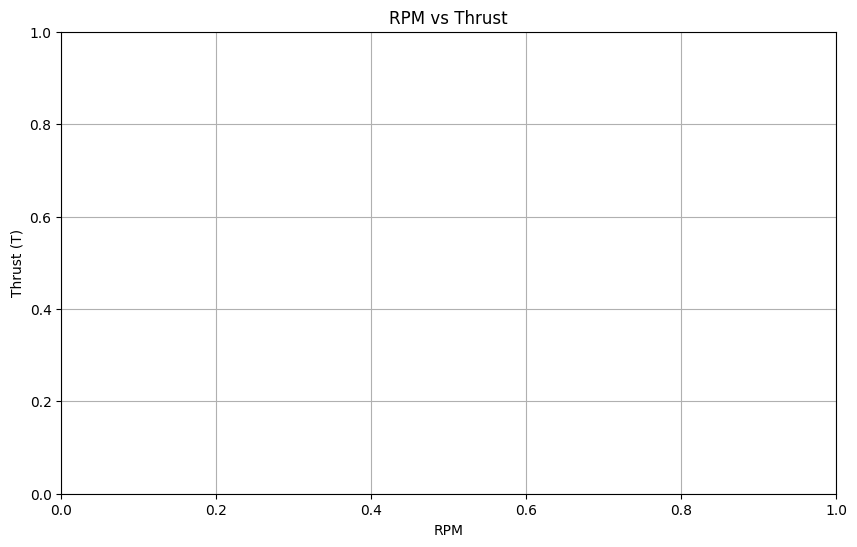

In [42]:
# Plot RPM vs T curve from predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
time1 = time()
for rpm in range(0, 8000, 1):
    prediction = model.predict(torch.tensor([[rpm]], dtype=torch.float32))
    #plt.plot(rpm, prediction[0][0].item(), 'ro')
time2 = time() - time1
print(f"Time taken for plotting: {time2:.2f} seconds")
plt.xlabel('RPM')
plt.ylabel('Thrust (T)')
plt.title('RPM vs Thrust')
plt.grid()
plt.show()